/var/folders/hc/nd6v4ynn2l5g_80dp7wkn2nr0000gp/T/ipykernel_36811/3194920117.py:7: DtypeWarning: Columns (6,7,8,9,16,17,18,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


‚úÖ –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–æ 113187 –∑–∞–ø–∏—Å—ñ–≤ –∑ aifw2/merged_logs.csv


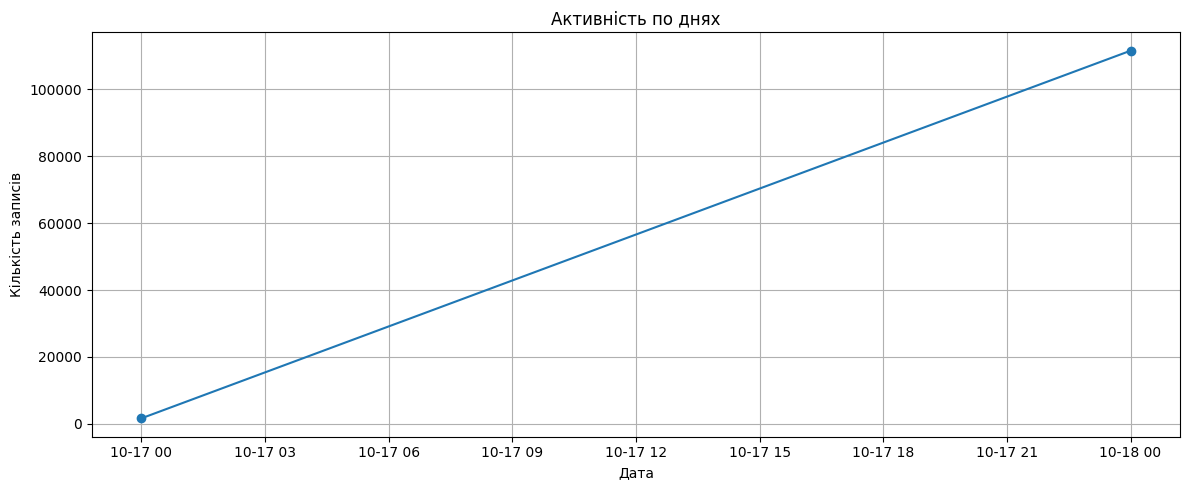

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

csv_path = "aifw2/merged_logs.csv"
df = pd.read_csv(csv_path)
print(f"‚úÖ –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–æ {len(df)} –∑–∞–ø–∏—Å—ñ–≤ –∑ {csv_path}")

if "timestamp" not in df.columns and "ts" in df.columns:
    df["timestamp"] = pd.to_datetime(df["ts"], errors="coerce")
else:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

df["hour"] = df["timestamp"].dt.hour
df["date"] = df["timestamp"].dt.date
df["dayofweek"] = df["timestamp"].dt.day_name()

if "source" not in df.columns:
    df["source"] = "unknown"


daily_counts = df.groupby("date").size()
plt.figure(figsize=(12,5))
daily_counts.plot(kind="line", marker="o")
plt.title("–ê–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –ø–æ –¥–Ω—è—Ö")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–ø–∏—Å—ñ–≤")
plt.grid(True)
plt.tight_layout()
plt.show()


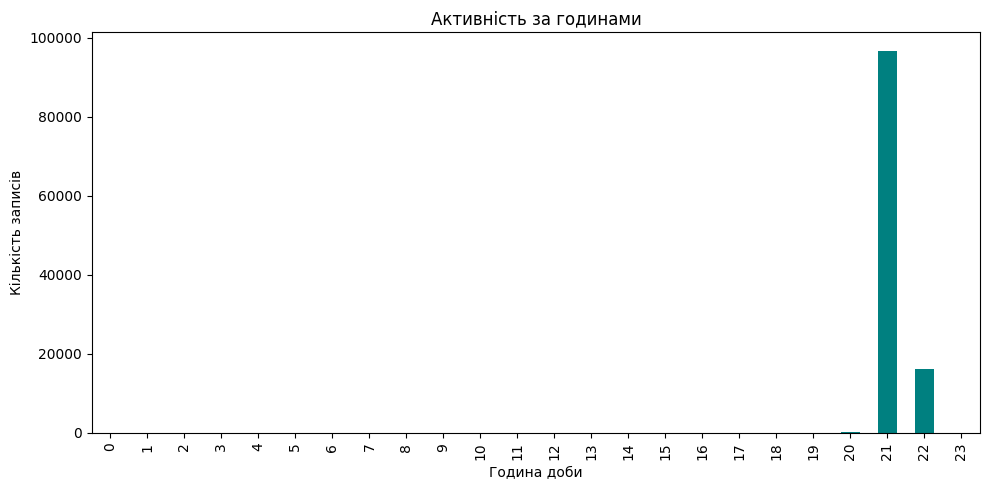

In [3]:
plt.figure(figsize=(10,5))
df["hour"].value_counts().sort_index().plot(kind="bar", color="teal")
plt.title("–ê–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∑–∞ –≥–æ–¥–∏–Ω–∞–º–∏")
plt.xlabel("–ì–æ–¥–∏–Ω–∞ –¥–æ–±–∏")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–ø–∏—Å—ñ–≤")
plt.tight_layout()
plt.show()

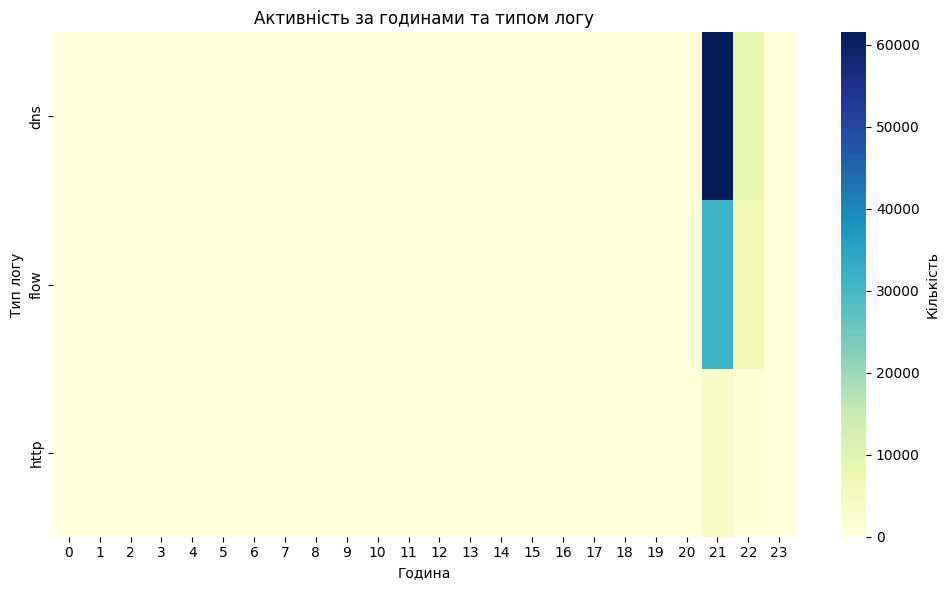

In [4]:
heatmap_data = df.groupby(["hour", "source"]).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data.T, cmap="YlGnBu", cbar_kws={"label": "–ö—ñ–ª—å–∫—ñ—Å—Ç—å"})
plt.title("–ê–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∑–∞ –≥–æ–¥–∏–Ω–∞–º–∏ —Ç–∞ —Ç–∏–ø–æ–º –ª–æ–≥—É")
plt.xlabel("–ì–æ–¥–∏–Ω–∞")
plt.ylabel("–¢–∏–ø –ª–æ–≥—É")
plt.tight_layout()
plt.show()

/var/folders/hc/nd6v4ynn2l5g_80dp7wkn2nr0000gp/T/ipykernel_36811/2140565057.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="rrname", x="count", data=top_domains, palette="Blues_r")


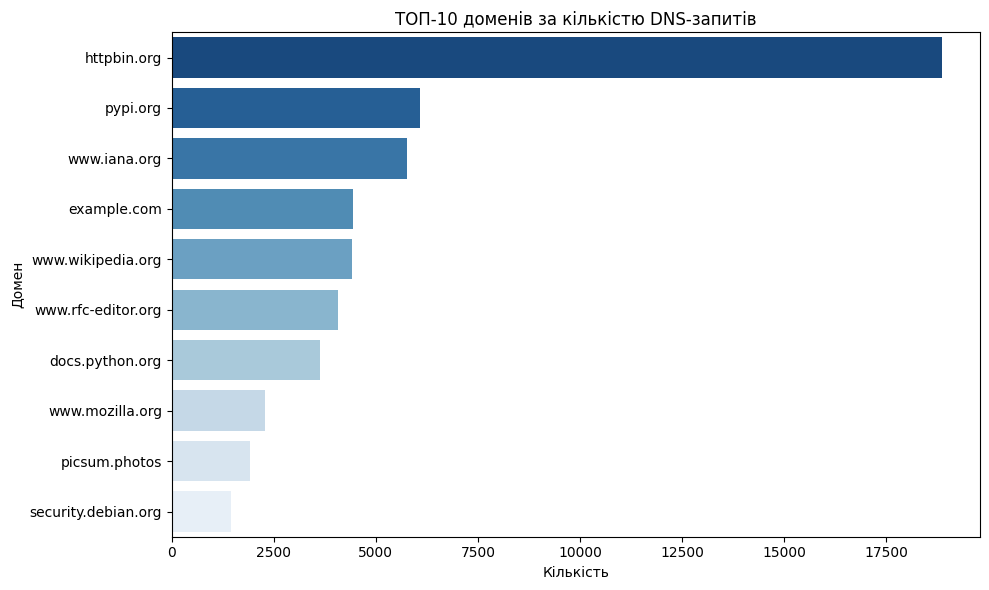

In [7]:

# === 4Ô∏è‚É£ –¢–û–ü-10 –¥–æ–º–µ–Ω—ñ–≤ ===
if "rrname" in df.columns:
    top_domains = (
        df["rrname"]
        .value_counts()
        .head(10)
        .reset_index()
        .rename(columns={"index": "domain", "domain": "count"})
    )
    plt.figure(figsize=(10,6))
    sns.barplot(y="rrname", x="count", data=top_domains, palette="Blues_r")
    plt.title("–¢–û–ü-10 –¥–æ–º–µ–Ω—ñ–≤ –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é DNS-–∑–∞–ø–∏—Ç—ñ–≤")
    plt.xlabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å")
    plt.ylabel("–î–æ–º–µ–Ω")
    plt.tight_layout()
    plt.show()

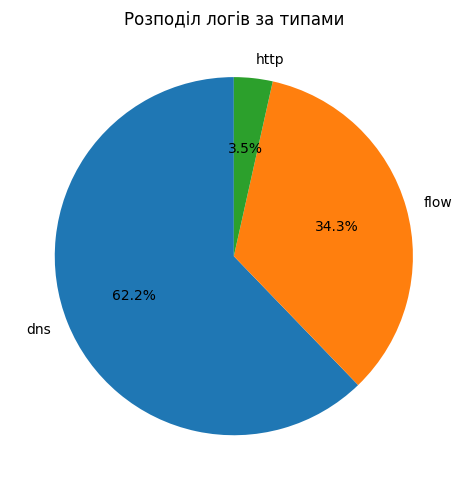

In [8]:
plt.figure(figsize=(8,5))
df["source"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –ª–æ–≥—ñ–≤ –∑–∞ —Ç–∏–ø–∞–º–∏")
plt.ylabel("")
plt.tight_layout()
plt.show()


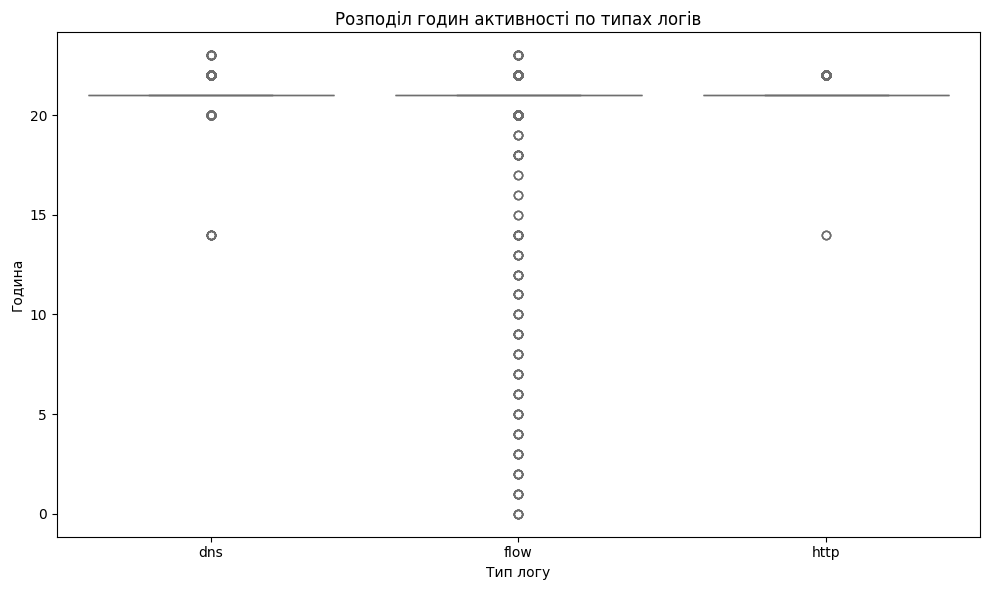

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="source", y="hour", hue="source", data=df, palette="coolwarm", legend=False)
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –≥–æ–¥–∏–Ω –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –ø–æ —Ç–∏–ø–∞—Ö –ª–æ–≥—ñ–≤")
plt.xlabel("–¢–∏–ø –ª–æ–≥—É")
plt.ylabel("–ì–æ–¥–∏–Ω–∞")
plt.tight_layout()
plt.show()


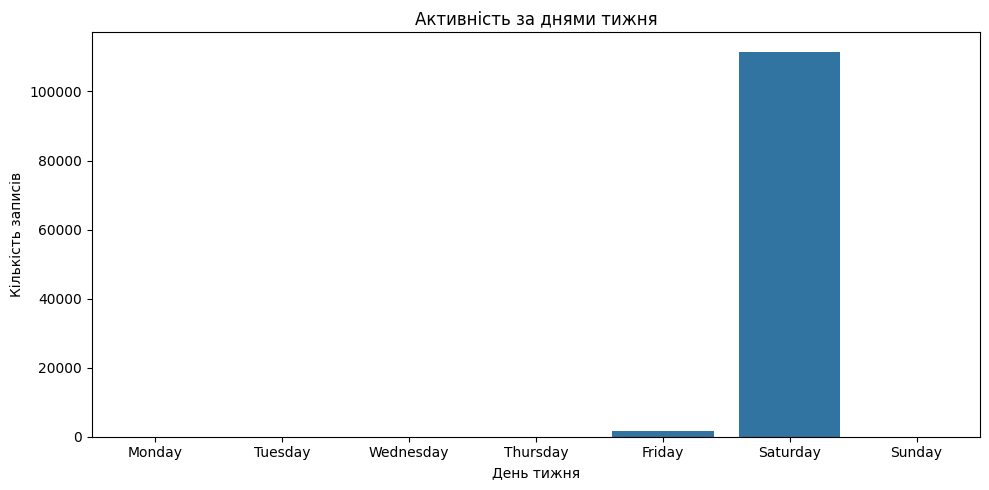

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="dayofweek", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("–ê–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è")
plt.xlabel("–î–µ–Ω—å —Ç–∏–∂–Ω—è")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–ø–∏—Å—ñ–≤")
plt.tight_layout()
plt.show()

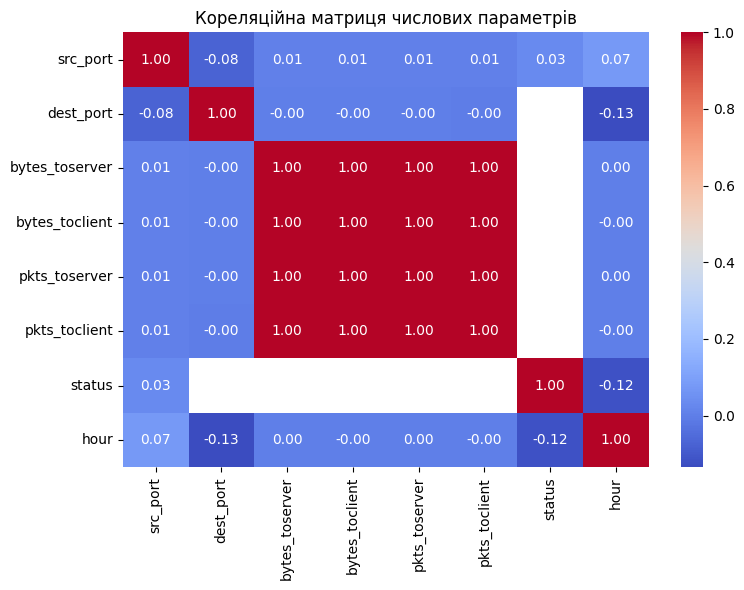

In [11]:
numeric_df = df.select_dtypes(include="number")
if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("–ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∞ –º–∞—Ç—Ä–∏—Ü—è —á–∏—Å–ª–æ–≤–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤")
    plt.tight_layout()
    plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/homebrew/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


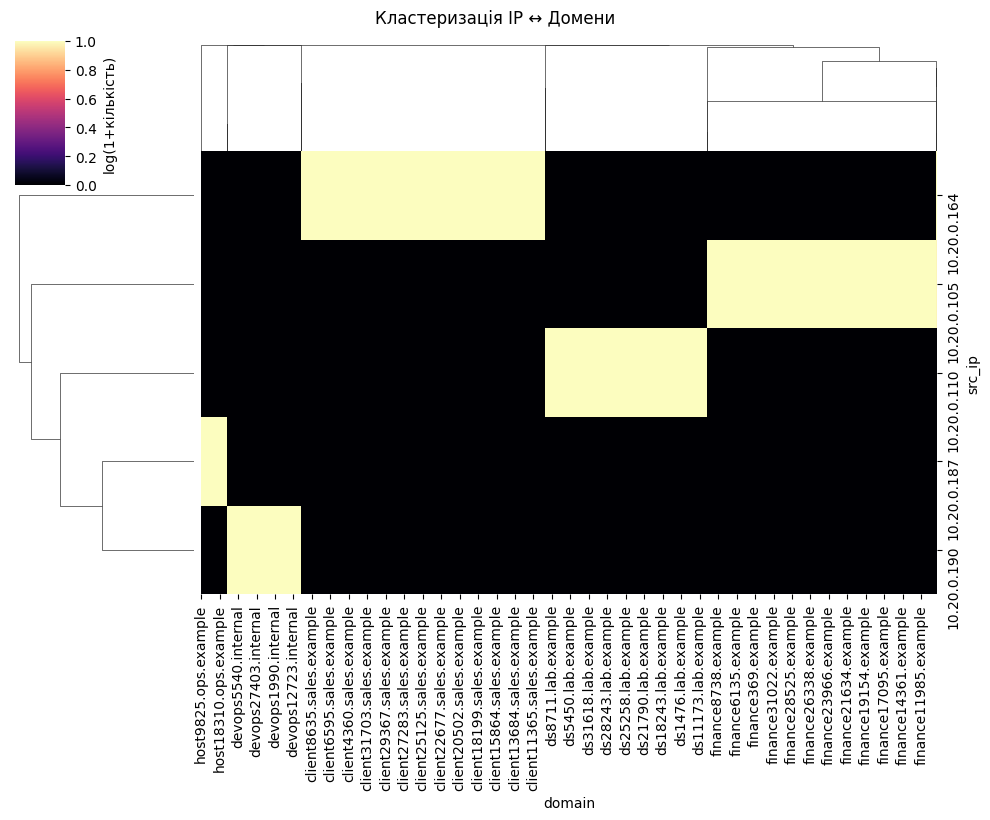

In [16]:
sns.clustermap(
    np.log1p(ip_domain_heatmap),
    cmap="magma",
    figsize=(10, 8),
    cbar_kws={"label": "log(1+–∫—ñ–ª—å–∫—ñ—Å—Ç—å)"},
    standard_scale=1
)
plt.suptitle("–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü—ñ—è IP ‚Üî –î–æ–º–µ–Ω–∏", y=1.02)
plt.show()


/var/folders/hc/nd6v4ynn2l5g_80dp7wkn2nr0000gp/T/ipykernel_36811/98205290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


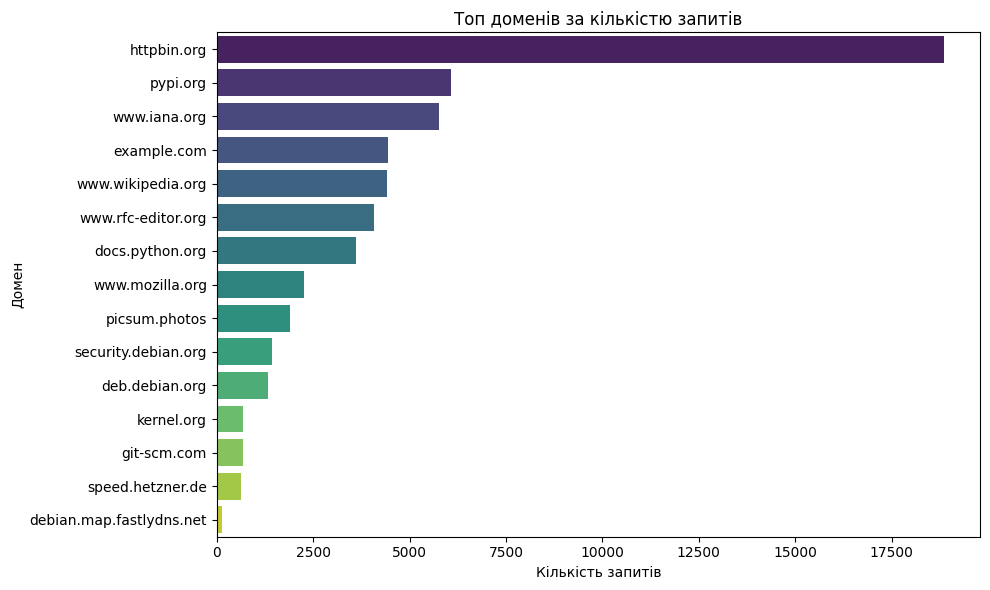

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clustered_domains.csv")
plt.figure(figsize=(10,6))
sns.barplot(
    data=df.sort_values("count", ascending=False).head(15),
    x="count", y="domain", palette="viridis"
)
plt.title("–¢–æ–ø –¥–æ–º–µ–Ω—ñ–≤ –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∑–∞–ø–∏—Ç—ñ–≤")
plt.xlabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–ø–∏—Ç—ñ–≤")
plt.ylabel("–î–æ–º–µ–Ω")
plt.tight_layout()
plt.show()


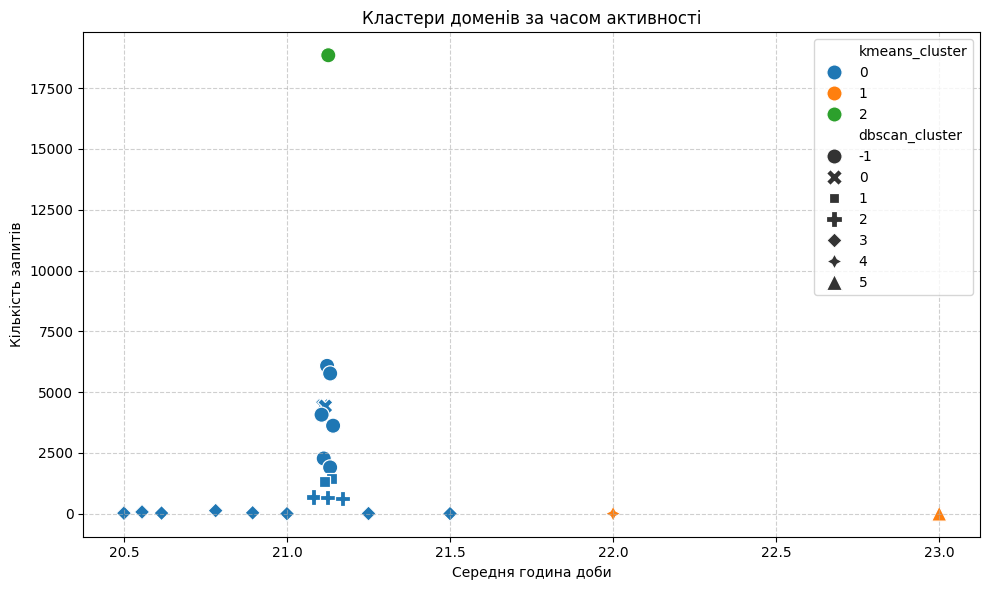

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="mean_hour", y="count",
    hue="kmeans_cluster", style="dbscan_cluster",
    palette="tab10", s=120
)
plt.title("–ö–ª–∞—Å—Ç–µ—Ä–∏ –¥–æ–º–µ–Ω—ñ–≤ –∑–∞ —á–∞—Å–æ–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ")
plt.xlabel("–°–µ—Ä–µ–¥–Ω—è –≥–æ–¥–∏–Ω–∞ –¥–æ–±–∏")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–ø–∏—Ç—ñ–≤")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


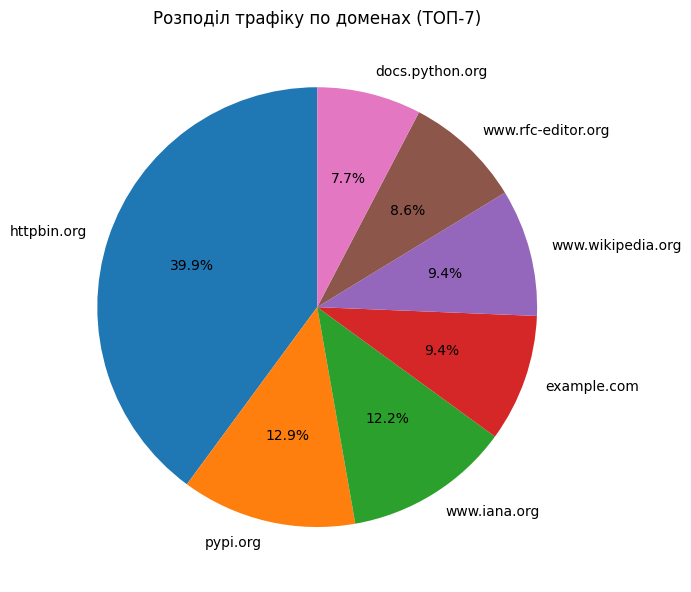

In [21]:
plt.figure(figsize=(7,7))
top = df.sort_values("count", ascending=False).head(7)
plt.pie(
    top["count"], labels=top["domain"], autopct="%1.1f%%", startangle=90
)
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª —Ç—Ä–∞—Ñ—ñ–∫—É –ø–æ –¥–æ–º–µ–Ω–∞—Ö (–¢–û–ü-7)")
plt.tight_layout()
plt.show()


/var/folders/hc/nd6v4ynn2l5g_80dp7wkn2nr0000gp/T/ipykernel_36811/2404382625.py:6: DtypeWarning: Columns (6,7,8,9,16,17,18,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  logs = pd.read_csv("aifw2/merged_logs.csv")


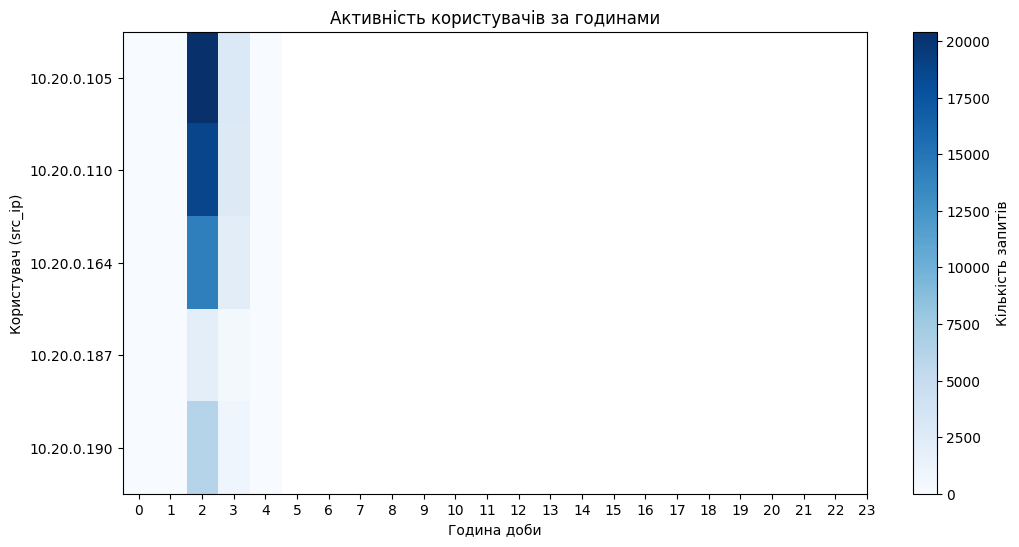

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1Ô∏è‚É£ –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö ===
domains = pd.read_csv("clustered_domains.csv")
logs = pd.read_csv("aifw2/merged_logs.csv")

# === 2Ô∏è‚É£ –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–∏—Ö ===
# –í–∏—Ç—è–≥—É—î–º–æ –ª–∏—à–µ –≤–∞–∂–ª–∏–≤—ñ –∫–æ–ª–æ–Ω–∫–∏
logs = logs[['timestamp', 'src_ip', 'rrname']].dropna()

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ timestamp —É datetime
logs['timestamp'] = pd.to_datetime(logs['timestamp'], errors='coerce')

# –í–∏—Ç—è–≥—É—î–º–æ –≥–æ–¥–∏–Ω—É –∑–∞–ø–∏—Ç—É
logs['hour'] = logs['timestamp'].dt.hour

# === 3Ô∏è‚É£ –û–±‚Äô—î–¥–Ω–∞–Ω–Ω—è –∑ –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ –¥–æ–º–µ–Ω—ñ–≤ ===
merged = logs.merge(domains, left_on='rrname', right_on='domain', how='left')

# === 4Ô∏è‚É£ –ê–≥—Ä–µ–≥–∞—Ü—ñ—è –¥–∞–Ω–∏—Ö –¥–ª—è –ø–æ–±—É–¥–æ–≤–∏ –≥—Ä–∞—Ñ—ñ–∫–∞ ===
user_activity = merged.groupby(['src_ip', 'hour']).size().reset_index(name='requests')

# === 5Ô∏è‚É£ –ü–æ–±—É–¥–æ–≤–∞ heatmap (–∞–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ –ø–æ –≥–æ–¥–∏–Ω–∞—Ö) ===
pivot = user_activity.pivot(index='src_ip', columns='hour', values='requests').fillna(0)

plt.figure(figsize=(12, 6))
plt.title("–ê–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ –∑–∞ –≥–æ–¥–∏–Ω–∞–º–∏")
plt.xlabel("–ì–æ–¥–∏–Ω–∞ –¥–æ–±–∏")
plt.ylabel("–ö–æ—Ä–∏—Å—Ç—É–≤–∞—á (src_ip)")
plt.imshow(pivot, aspect='auto', cmap='Blues')
plt.colorbar(label='–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–ø–∏—Ç—ñ–≤')
plt.xticks(range(24))
plt.yticks(range(len(pivot.index)), pivot.index)
plt.show()


In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# === 1Ô∏è‚É£ –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö ===
domains = pd.read_csv("clustered_domains.csv")
logs = pd.read_csv("aifw2/merged_logs.csv")

# === 2Ô∏è‚É£ –§—ñ–ª—å—Ç—Ä–∞—Ü—ñ—è –≤–∞–∂–ª–∏–≤–∏—Ö –ø–æ–ª—ñ–≤ ===
logs = logs[['src_ip', 'rrname', 'proto']].dropna().drop_duplicates()

# === 3Ô∏è‚É£ –û–±'—î–¥–Ω–∞–Ω–Ω—è –∑ –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ –¥–æ–º–µ–Ω—ñ–≤ ===
merged = logs.merge(domains, left_on='rrname', right_on='domain', how='left')

# === 4Ô∏è‚É£ –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ–∞ ===
G = nx.Graph()

for _, row in merged.iterrows():
    user = row['src_ip']
    domain = row['rrname']
    proto = row['proto']
    k_cluster = row['kmeans_cluster']
    db_cluster = row['dbscan_cluster']

    # –¥–æ–¥–∞—î–º–æ –≤—É–∑–ª–∏
    G.add_node(user, type='user', color='skyblue')
    G.add_node(domain, type='domain',
               color='red' if db_cluster == -1 else 'skyblue')
    G.add_node(proto, type='proto', color='orange')

    # –∑'—î–¥–Ω—É—î–º–æ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á–∞ ‚Üî –ø—Ä–æ—Ç–æ–∫–æ–ª ‚Üî –¥–æ–º–µ–Ω
    G.add_edge(user, proto)
    G.add_edge(proto, domain)

# === 5Ô∏è‚É£ –ú–∞–ª—é–≤–∞–Ω–Ω—è ===
pos = nx.spring_layout(G, k=0.7, iterations=50, seed=42)
colors = [nx.get_node_attributes(G, 'color')[n] for n in G.nodes]

plt.figure(figsize=(12, 8))
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=900,
    font_size=8,
    edge_color='gray'
)
plt.title("–ì—Ä–∞—Ñ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ ‚Üî —Å–µ—Ä–≤—ñ—Å—ñ–≤ ‚Üî –ø—Ä–æ—Ç–æ–∫–æ–ª—ñ–≤ (–∞–Ω–æ–º–∞–ª—ñ—ó –≤–∏–¥—ñ–ª–µ–Ω–æ —á–µ—Ä–≤–æ–Ω–∏–º)")
plt.axis('off')
plt.show()


/var/folders/hc/nd6v4ynn2l5g_80dp7wkn2nr0000gp/T/ipykernel_36811/752466848.py:7: DtypeWarning: Columns (6,7,8,9,16,17,18,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  logs = pd.read_csv("aifw2/merged_logs.csv")


ValueError: Buffer dtype mismatch, expected 'ITYPE_t' but got 'long'

Exception ignored in: 'scipy.sparse.csgraph._traversal._connected_components_undirected'
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/networkx/drawing/layout.py", line 830, in _energy_fruchterman_reingold
    n_components, labels = sp.sparse.csgraph.connected_components(A, directed=False)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: Buffer dtype mismatch, expected 'ITYPE_t' but got 'long'


ValueError: 'list' argument must have no negative elements

/var/folders/hc/nd6v4ynn2l5g_80dp7wkn2nr0000gp/T/ipykernel_36811/2671571139.py:7: DtypeWarning: Columns (6,7,8,9,16,17,18,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  logs = pd.read_csv("aifw2/merged_logs.csv")


ValueError: Buffer dtype mismatch, expected 'ITYPE_t' but got 'long'

Exception ignored in: 'scipy.sparse.csgraph._traversal._connected_components_undirected'
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/networkx/drawing/layout.py", line 830, in _energy_fruchterman_reingold
    n_components, labels = sp.sparse.csgraph.connected_components(A, directed=False)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: Buffer dtype mismatch, expected 'ITYPE_t' but got 'long'


‚ö†Ô∏è –ü—Ä–æ–±–ª–µ–º–∞ –ø—Ä–∏ —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫—É layout: 'list' argument must have no negative elements


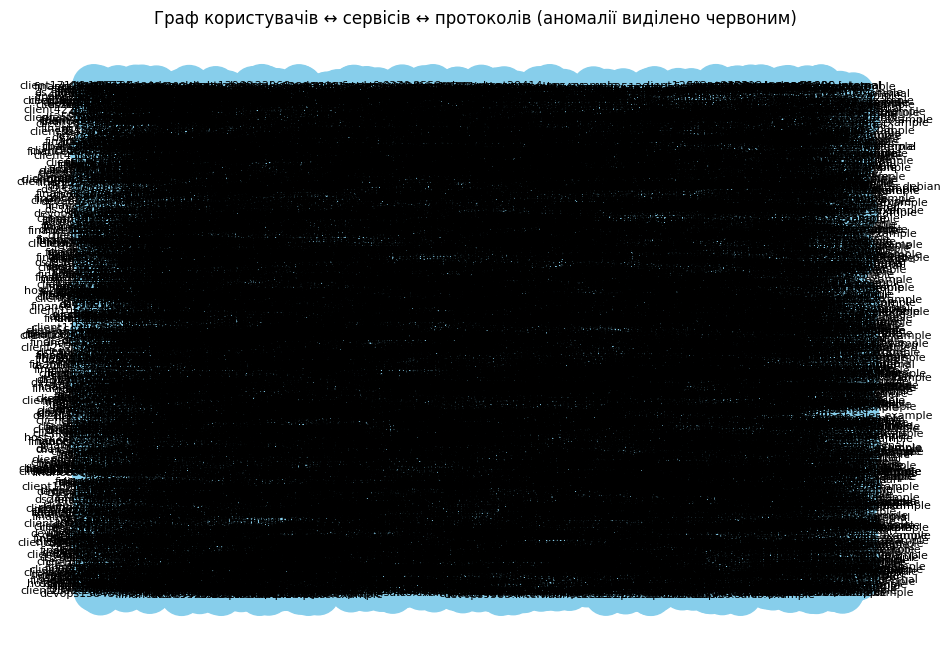

In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# === 1Ô∏è‚É£ –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è ===
domains = pd.read_csv("clustered_domains.csv")
logs = pd.read_csv("aifw2/merged_logs.csv")

# === 2Ô∏è‚É£ –û—á–∏—â–µ–Ω–Ω—è ===
logs = logs[['src_ip', 'rrname', 'proto']].dropna().drop_duplicates()
domains = domains.dropna(subset=['domain'])

merged = logs.merge(domains, left_on='rrname', right_on='domain', how='left')

# === 3Ô∏è‚É£ –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ–∞ ===
G = nx.Graph()

for _, row in merged.iterrows():
    user = str(row['src_ip']).strip()
    domain = str(row['rrname']).strip()
    proto = str(row['proto']).strip()
    db_cluster = row.get('dbscan_cluster', 0)

    # –ü—Ä–æ–ø—É—Å–∫ –ø—É—Å—Ç–∏—Ö –∞–±–æ NaN
    if not user or not domain or not proto or user == 'nan' or domain == 'nan':
        continue

    # === –î–æ–¥–∞—î–º–æ –≤—É–∑–ª–∏ ===
    G.add_node(user, type='user', color='skyblue')
    G.add_node(domain, type='domain',
               color='red' if db_cluster == -1 else 'skyblue')
    G.add_node(proto, type='proto', color='orange')

    # –ó–∞–±–æ—Ä–æ–Ω—è—î–º–æ —Å–∞–º–æ–∑–≤‚Äô—è–∑–∫–∏
    if user != proto:
        G.add_edge(user, proto)
    if proto != domain:
        G.add_edge(proto, domain)

# === 4Ô∏è‚É£ –í–∏–¥–∞–ª—è—î–º–æ –ø–µ—Ç–ª—ñ –π –¥—É–±–ª—ñ–∫–∞—Ç–∏ ===
G.remove_edges_from(nx.selfloop_edges(G))

# === 5Ô∏è‚É£ –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞
if len(G.nodes) == 0:
    raise ValueError("‚ùå –ü—ñ—Å–ª—è –æ—á–∏—â–µ–Ω–Ω—è –Ω–µ –∑–∞–ª–∏—à–∏–ª–æ—Å—è –≤—É–∑–ª—ñ–≤.")

# === 6Ô∏è‚É£ –ü–æ–±—É–¥–æ–≤–∞ layout ===
try:
    pos = nx.spring_layout(G, k=0.7, iterations=50, seed=42)
except ValueError as e:
    print("‚ö†Ô∏è –ü—Ä–æ–±–ª–µ–º–∞ –ø—Ä–∏ —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫—É layout:", e)
    pos = nx.random_layout(G, seed=42)  # fallback, —â–æ–± –Ω–µ –ø–∞–¥–∞–ª–æ

colors = [nx.get_node_attributes(G, 'color').get(n, 'gray') for n in G.nodes]

plt.figure(figsize=(12, 8))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_color=colors,
    node_size=900,
    font_size=8,
    edge_color='gray'
)
plt.title("–ì—Ä–∞—Ñ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ ‚Üî —Å–µ—Ä–≤—ñ—Å—ñ–≤ ‚Üî –ø—Ä–æ—Ç–æ–∫–æ–ª—ñ–≤ (–∞–Ω–æ–º–∞–ª—ñ—ó –≤–∏–¥—ñ–ª–µ–Ω–æ —á–µ—Ä–≤–æ–Ω–∏–º)")
plt.axis('off')
plt.show()


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# === 1Ô∏è‚É£ –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö ===
domains = pd.read_csv("clustered_domains.csv")
logs = pd.read_csv("aifw2/merged_logs.csv")

# === 2Ô∏è‚É£ –ü–æ–ø–µ—Ä–µ–¥–Ω—è –æ–±—Ä–æ–±–∫–∞ ===
logs = logs[['src_ip', 'rrname', 'proto']].dropna().drop_duplicates()
domains = domains.dropna(subset=['domain'])

merged = logs.merge(domains, left_on='rrname', right_on='domain', how='left')

# === 3Ô∏è‚É£ –ü–∞–ø–∫–∞ –¥–ª—è –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–≤ ===
os.makedirs("user_graphs", exist_ok=True)

# === 4Ô∏è‚É£ –ì–µ–Ω–µ—Ä–∞—Ü—ñ—è –æ–∫—Ä–µ–º–æ–≥–æ –≥—Ä–∞—Ñ–∞ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á–∞ ===
for user, df_user in merged.groupby('src_ip'):
    # üîπ –ü–æ–∫—Ä–∞—â–µ–Ω–Ω—è: –∑–∞–ª–∏—à–∞—î–º–æ –ª–∏—à–µ –Ω–∞–π–≤–∞–∂–ª–∏–≤—ñ—à—ñ (—Ç–æ–ø-30) –¥–æ–º–µ–Ω–∏
    if 'count' in df_user.columns:
        df_user = df_user.sort_values('count', ascending=False).head(30)
    else:
        df_user = df_user.head(30)

    # üîπ –ú–æ–∂–Ω–∞ –¥–æ–¥–∞—Ç–∫–æ–≤–æ –ø–æ–∫–∞–∑—É–≤–∞—Ç–∏ –ª–∏—à–µ –∞–Ω–æ–º–∞–ª—ñ—ó + –∫—ñ–ª—å–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–∏—Ö
    if 'dbscan_cluster' in df_user.columns:
        df_user = pd.concat([
            df_user[df_user['dbscan_cluster'] == -1],
            df_user[df_user['dbscan_cluster'] != -1].head(20)
        ])

    G = nx.Graph()

    for _, row in df_user.iterrows():
        domain = str(row['rrname']).strip()
        proto = str(row['proto']).strip()
        db_cluster = row.get('dbscan_cluster', 0)

        if not domain or not proto or domain == 'nan':
            continue

        # === –í—É–∑–ª–∏ ===
        G.add_node(user, type='user', color='skyblue')
        G.add_node(proto, type='proto', color='orange')
        G.add_node(domain, type='domain', color='red' if db_cluster == -1 else 'lightblue')

        # === –ó–≤‚Äô—è–∑–∫–∏ ===
        if user != proto:
            G.add_edge(user, proto)
        if proto != domain:
            G.add_edge(proto, domain)

    # === –ë–µ–∑ —Å–∞–º–æ–∑–≤‚Äô—è–∑–∫—ñ–≤ ===
    G.remove_edges_from(nx.selfloop_edges(G))

    if len(G.nodes) == 0:
        continue

    # === 5Ô∏è‚É£ –ö—Ä–∞—â–µ —Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è –≤—É–∑–ª—ñ–≤ ===
    try:
        pos = nx.kamada_kawai_layout(G)
    except ValueError:
        pos = nx.spring_layout(G, k=1.2, iterations=50, seed=42)

    colors = [nx.get_node_attributes(G, 'color').get(n, 'gray') for n in G.nodes]

    # === 6Ô∏è‚É£ –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è ===
    plt.figure(figsize=(10, 8))
    nx.draw_networkx(
        G, pos,
        with_labels=True,
        node_color=colors,
        node_size=450,
        font_size=7,
        alpha=0.9,
        edge_color='gray',
        width=0.6
    )

    plt.title(f"–ì—Ä–∞—Ñ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á–∞ {user} ‚Üî —Å–µ—Ä–≤—ñ—Å–∏ ‚Üî –ø—Ä–æ—Ç–æ–∫–æ–ª–∏ (–∞–Ω–æ–º–∞–ª—ñ—ó —á–µ—Ä–≤–æ–Ω—ñ)")
    plt.axis('off')

    # === 7Ô∏è‚É£ –ó–±–µ—Ä–µ–∂–µ–Ω–Ω—è ===
    plt.savefig(f"user_graphs/{user.replace('.', '_')}.png", bbox_inches='tight')
    plt.close()

print("‚úÖ –ì—Ä–∞—Ñ–∏ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ –∑–±–µ—Ä–µ–∂–µ–Ω–æ –≤ –ø–∞–ø–∫—É user_graphs/")


/var/folders/hc/nd6v4ynn2l5g_80dp7wkn2nr0000gp/T/ipykernel_1832/2214397810.py:8: DtypeWarning: Columns (6,7,8,9,16,17,18,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  logs = pd.read_csv("aifw2/merged_logs.csv")


‚úÖ –ì—Ä–∞—Ñ–∏ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ –∑–±–µ—Ä–µ–∂–µ–Ω–æ –≤ –ø–∞–ø–∫—É user_graphs/
